In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('..')
from lib import *
from lib.maxent import *

from numba import njit

In [2]:
mcmc_kwargs = dict(nsteps=1e6, nsample=10, nburnin=1e3)

In [4]:
L = 9
params = np.load('../maxent/data/Human_nskewfcov_%i.npz'%L)
hi = params['hi']
Jij = params['Jij']

In [5]:
Fs = [Fpotts_thermodynamic_integration(hi, Jij, integration_intervals=3, mcmc_kwargs=mcmc_kwargs) for i in range(10)]

KeyboardInterrupt: 

In [ ]:
Fexact = Fpotts_thermodynamic_integration(hi, Jij, integration_intervals=6,
                                     mcmc_kwargs=dict(nsteps=2e6, nsample=10, nburnin=1e3))

In [10]:
F0 = -np.sum(np.log(np.sum(np.exp(hi), axis=1)))
F0

-28.03156529665821

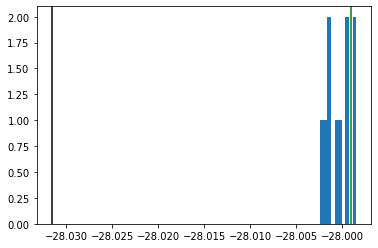

In [11]:
fig, ax = plt.subplots()
ax.hist(Fs)
ax.axvline(F0, c='k')
ax.axvline(Fexact, c='g')
fig.savefig('main.png')

In [14]:
np.std(Fs, ddof=1)/(np.mean(Fs)-F0)

0.04384399496514539